In [52]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

# Importing the Csv's for modeling

In [2]:
X_train_binary_1 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_train_binary_1.csv', index_col='encounter_id')
X_val_binary_1 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_val_binary_1.csv', index_col='encounter_id')
y_train_binary_1 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_train_binary_1.csv', index_col='encounter_id')
y_val_binary_1 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_val_binary_1.csv', index_col='encounter_id')
test_binary_1 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/test_1.csv')

In [3]:
test_binary_1_copy = test_binary_1.copy() 

In [4]:
test_binary_1.head()

,encounter_id,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other_code,admission_type_Elective,admission_type_Emergency,...,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,is_normal_pulse
0,499502,0,1,0,1,0,0,0,0,1,...,0,14,6,1,1,85.0,1,1,0,0
1,447319,0,1,0,1,0,0,0,0,1,...,1,7,7,0,0,25.0,1,0,0,1
2,309126,1,0,0,0,0,1,0,0,1,...,3,12,6,1,1,35.0,1,1,0,1
3,181183,0,1,0,0,0,0,1,0,0,...,1,16,9,1,3,55.0,1,1,1,0
4,359339,0,1,0,0,0,1,0,0,1,...,0,10,9,1,1,65.0,1,1,0,0


In [5]:
test_binary_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 70 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   encounter_id                                                                                            30530 non-null  int64  
 1   race_AfricanAmerican                                                                                    30530 non-null  int64  
 2   race_Caucasian                                                                                          30530 non-null  int64  
 3   race_Other                                                                                              30530 non-null  int64  
 4   payer_code_HM                                                                           

In [6]:
X_train_binary_1.columns = X_train_binary_1.columns.str.replace('[ ,]', '_', regex=True)
X_val_binary_1.columns = X_val_binary_1.columns.str.replace('[ ,]', '_', regex=True)

In [7]:
X_train_binary_1.shape

(53427, 69)

# Feature Selection

Previous used columns:
'discharge_disposition_Discharged to home', 'inpatient_visits', 'outpatient_visits', 'emergency_visits', 'number_diagnoses',
'diabetes_meds_binary', 'average_pulse_bpm', 'number_of_medications', 'number_lab_tests', 'Midpoint_Age'

### Univariate Methods

In [8]:
numeric_columns = ['outpatient_visits','emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 
                   'number_lab_tests', 'non_lab_procedures','number_of_medications', 'number_diagnoses', 'number_prescriptions',
                   'Midpoint_Age']

In [9]:
X_train_binary_1[numeric_columns].var()

outpatient_visits          1.658062
emergency_visits           0.880346
inpatient_visits           1.609366
average_pulse_bpm        530.336335
length_of_stay             8.975235
number_lab_tests         384.826582
non_lab_procedures         2.909965
number_of_medications     65.495039
number_diagnoses           3.736187
number_prescriptions       0.845097
Midpoint_Age             245.935704
dtype: float64

Since the is no variance equal to 0, then there is no numerical variable that is univariate. With that in mind, we don´t need to drop any column. Adding to this, we can say that there are some numerical variables with high variance like Midpoint_Age, number_lab_tests and average_pulse_bpm (we could also say number_of_medications), and some with low variance like emergency_visits and number_prescriptions.

### Correlation indices

In [10]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [11]:
cor_spearman = X_train_binary_1[numeric_columns].corr(method ='spearman')
cor_spearman

,outpatient_visits,emergency_visits,inpatient_visits,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,number_prescriptions,Midpoint_Age
outpatient_visits,1.000000,0.178239,0.154406,0.003741,-0.011900,-0.021399,-0.026964,0.071612,0.111438,0.004986,0.024640
emergency_visits,0.178239,1.000000,0.216654,0.000970,-0.003668,0.006584,-0.043619,0.042457,0.088748,0.015773,-0.053773
inpatient_visits,0.154406,0.216654,1.000000,0.003707,0.090804,0.041561,-0.067057,0.098296,0.135500,-0.016267,0.016056
average_pulse_bpm,0.003741,0.000970,0.003707,1.000000,0.001537,-0.001670,-0.004411,0.003625,-0.001355,0.000337,0.006627
length_of_stay,-0.011900,-0.003668,0.090804,0.001537,1.000000,0.333035,0.190399,0.462737,0.240230,0.086590,0.122734
number_lab_tests,-0.021399,0.006584,0.041561,-0.001670,0.333035,1.000000,0.018434,0.246450,0.172129,0.028189,0.028675
non_lab_procedures,-0.026964,-0.043619,-0.067057,-0.004411,0.190399,0.018434,1.000000,0.348313,0.069969,-0.008855,-0.063130
number_of_medications,0.071612,0.042457,0.098296,0.003625,0.462737,0.246450,0.348313,1.000000,0.296157,0.237336,0.028013
number_diagnoses,0.111438,0.088748,0.135500,-0.001355,0.240230,0.172129,0.069969,0.296157,1.000000,0.014665,0.194423
number_prescriptions,0.004986,0.015773,-0.016267,0.000337,0.086590,0.028189,-0.008855,0.237336,0.014665,1.000000,-0.007739


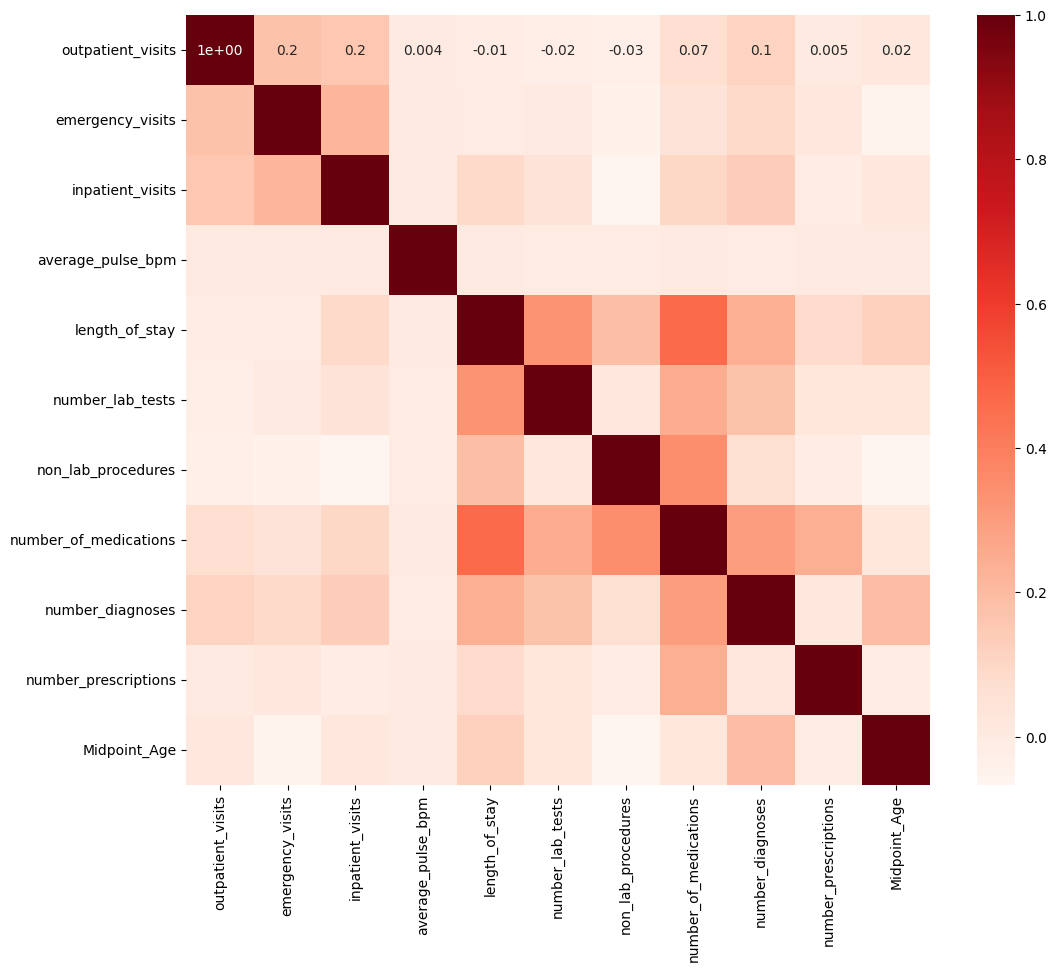

In [12]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There is one pair of variables that is significantly correlated:
    - length_of_stay vs number_of_medications (0.5) <br>

### Chi-square

- 'race_AfricanAmerican', 'race_Caucasian', 'race_Other';
- 'payer_code_HM','payer_code_MC', 'payer_code_None', 'payer_code_Other_code';
- 'admission_type_Elective','admission_type_Emergency','admission_type_Other_type','admission_type_Urgent','medical_specialty_Cardiology';
- 'medical_specialty_Emergency/Trauma','medical_specialty_Family/GeneralPractice','medical_specialty_InternalMedicine','medical_specialty_Other_specialty', 'medical_specialty_Surgery';
- 'discharge_disposition_Discharged to home','discharge_disposition_Expired', 'discharge_disposition_Other','discharge_disposition_Transferred to another medical facility','discharge_disposition_Unknown';
- 'admission_source_ Emergency Room','admission_source_ Physician Referral', 'admission_source_Other_source';
- 'primary_diagnosis_types_Diseases of the circulatory system','primary_diagnosis_types_Diseases of the digestive system','primary_diagnosis_types_Diseases of the respiratory system','primary_diagnosis_types_External causes of injury and supplemental classification','primary_diagnosis_types_Injury and poisoning','primary_diagnosis_types_Other_type','primary_diagnosis_types_Symptoms, signs, and ill-defined conditions';
- 'secondary_diagnosis_types_Diseases of the circulatory system','secondary_diagnosis_types_Diseases of the genitourinary system','secondary_diagnosis_types_Diseases of the respiratory system','secondary_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders','secondary_diagnosis_types_External causes of injury and supplemental classification','secondary_diagnosis_types_Other_type';
- 'additional_diagnosis_types_Diseases of the circulatory system','additional_diagnosis_types_Diseases of the genitourinary system','additional_diagnosis_types_Diseases of the respiratory system','additional_diagnosis_types_Endocrine, nutritional and metabolic diseases, and immunity disorders','additional_diagnosis_types_External causes of injury and supplemental classification','additional_diagnosis_types_Other_type';
- 'glucose_test_result_>200','glucose_test_result_>300', 'glucose_test_result_None', 'glucose_test_result_Norm';
- 'a1c_test_result_>7', 'a1c_test_result_>8','a1c_test_result_None', 'a1c_test_result_Norm';
- 'diabetes_meds_binary', 'change_in_meds_binary','is_normal_pulse', 'medication', 'gender_binary';
These were the columns that were considered important (the ones not here were discarted)

### Visualize the weight of the dependent variable in categorical data

Based on the visualizations we have seen on the Cleaning&PreProcessing notebook (we in the future will merge the notebooks, but I think putting every visualization here will fill too much this notebook), these are the conclusions we take:

Columns that are not correlated with the target: 

- medication
- admission_type (maybe Emergency a bit)
- admission_source (maybe Emergency_room a bit)
- is_normal_pulse
- average_pulse_bpm
- gender_binary
- number_lab_tests
- number_prescriptions

Columns that have some correlation with the target: 

- race (other)
- MidPointAge
- discharge_disposition (Expired, Other, Transferred to another medical facility)
- medical_specialty (Cardiology)
- primary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Injury and poisoning)
- secondary_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, External causes of injury and supplemental classification)
- additional_diagnosis_types (Endocrine, nutritional and metabolic diseases, and immunity disorders, Diseases of the genitourinary system)
- glucose_test_result (>300)
- a1c_test_result (None)
- diabetes_meds_binary
- change_in_meds_binary
- length_of_stay
- non_lab_procedures
- number_of_medications
- number_diagnoses
- emergency_visits
- inpatient_visits


Maybe yes/Maybe no: 

- payer_code
- outpatient_visits


### Point Biserial Correlation

More than 0.01 Corr: 
- length_of_stay
- number_lab_tests 
- non_lab_procedures 
- number_of_medications 
- number_diagnoses 
- outpatient_visits 
- emergency_visits 
- inpatient_visits

### Recursive Feature Selection

In [13]:
y_train_binary_1 = y_train_binary_1[y_train_binary_1.columns[0]].map({'Yes': 1, 'No': 0})
y_val_binary_1 = y_val_binary_1[y_val_binary_1.columns[0]].map({'Yes': 1, 'No': 0})

In [14]:
X_train_binary_1.shape

(53427, 69)

In [15]:
robust_scaler_before = RobustScaler()
X_train_robust_before = robust_scaler_before.fit_transform(X_train_binary_1)
X_val_robust_before = robust_scaler_before.transform(X_val_binary_1)

In [17]:
# No Feature Selection
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)
lr.fit(X_train_robust_before, y_train_binary_1)

# Predict on training set and calculate F1 score
y_guess = lr.predict(X_train_robust_before)
print("F1 Score (No Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = lr.predict(X_val_robust_before)
print("F1 Score (No Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

F1 Score (No Feature Selection) on train: 0.2690297481039022
F1 Score (No Feature Selection) on val: 0.2688757396449704


In [18]:
# Feature Selection with RFE
rfe = RFE(lr, n_features_to_select=50)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_HM', 'payer_code_None', 'payer_code_Other_code', 'admission_type_Elective', 'admission_type_Other_type', 'admission_type_Urgent', 'medical_specialty_Cardiology', 'medical_specialty_Emergency_Trauma', 'medical_specialty_Family_GeneralPractice', 'medical_specialty_InternalMedicine', 'medical_specialty_Other_specialty', 'medical_specialty_Surgery', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_Diseases_of_the_circulatory_system', 'primary_diagnosis_types_Diseases_of_the_digestive_system', 'primary_diagnosis_types_Diseases_of_the_respiratory_system', 'primary_diagnosis_types_External_c

In [36]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 50
Selected Features: [ True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True  True  True  True False False  True False  True  True
  True  True  True  True False False  True False False  True False  True
 False  True False  True False False  True  True  True False False  True
  True  True  True  True  True False  True  True  True]
Feature Ranking: [ 1  1  1  1 15  1  1  1  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  8
  1  7  1  1  1  1 17  3  1 11  1  1  1  1  1  1  4 20  1 12 19  1  2  1
 16  1  5  1 10 18  1  1  1 14 13  1  1  1  1  1  1  9  1  1  1]


In [45]:
rfe = RFE(lr, n_features_to_select=40)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_HM', 'payer_code_None', 'payer_code_Other_code', 'admission_type_Elective', 'admission_type_Other_type', 'medical_specialty_Family_GeneralPractice', 'medical_specialty_InternalMedicine', 'medical_specialty_Other_specialty', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_Diseases_of_the_circulatory_system', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_Diseases_of_the_genitourinary_system', 'secondary_diagnosis_types_Diseases_of_the_respiratory_system

In [46]:
rfe = RFE(lr, n_features_to_select=35)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_None', 'admission_type_Elective', 'medical_specialty_Family_GeneralPractice', 'medical_specialty_InternalMedicine', 'medical_specialty_Other_specialty', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_Diseases_of_the_circulatory_system', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_Diseases_of_the_genitourinary_system', 'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'secondary_diagnosis_types_Other_type', 'addi

In [47]:
rfe = RFE(lr, n_features_to_select=30)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_AfricanAmerican', 'race_Caucasian', 'race_Other', 'payer_code_None', 'medical_specialty_Family_GeneralPractice', 'medical_specialty_InternalMedicine', 'medical_specialty_Other_specialty', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_Diseases_of_the_circulatory_system', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'secondary_diagnosis_types_Other_type', 'additional_diagnosis_types_Diseases_of_the_circulatory_system', 'additional_diagnosis_types_Endoc

In [48]:
rfe = RFE(lr, n_features_to_select=25)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_Other', 'payer_code_None', 'medical_specialty_Family_GeneralPractice', 'medical_specialty_InternalMedicine', 'medical_specialty_Other_specialty', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_Diseases_of_the_circulatory_system', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'additional_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders', 'glucose_test_result_>200', 'glucose_test_result_None', 'inpatient_visits', 'numbe

In [49]:
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_Other', 'payer_code_None', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'admission_source_Other_source', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'glucose_test_result_>200', 'glucose_test_result_None', 'inpatient_visits', 'number_diagnoses', 'medication', 'number_prescriptions', 'diabetes_meds_binary', 'change_in_meds_binary']
F1 Score (With Feature Selection) on train: 0.2656780487804878
F1 Score (With Feature Selection) on val: 0.268857886025065


In [50]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train_robust_before, y_train_binary_1)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_1.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_robust_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_1, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_robust_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_1, y_score))

Selected Features: ['race_Other', 'payer_code_None', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Discharged_transferred_referred_another_this_institution_for_outpatient_services', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'discharge_disposition_Unknown', 'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'primary_diagnosis_types_Symptoms_signs_and_ill_defined_conditions', 'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification', 'glucose_test_result_>200', 'inpatient_visits', 'number_diagnoses', 'medication']
F1 Score (With Feature Selection) on train: 0.2646887499514582
F1 Score (With Feature Selection) on val: 0.2686217008797654


### Sequential Feature Selection

In [ ]:
# Sequential Feature Selection

sfs = SequentialFeatureSelector(lr, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_train_robust_before, y_train_binary_1)
# y_guess = sfs.predict(X_train)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)

# robust_scaler_before2 = RobustScaler()
# X_train_robust_before2 = robust_scaler_before2.fit_transform(X_train_binary_1[features])
# X_val_robust_before2 = robust_scaler_before2.transform(X_val_binary_1[features])

# lr.fit(X_train_robust_before[features], y_train_binary_1)
# y_score = lr.predict(X_val_robust_before[features])

# #save features
# print("Accuracy With Feature Selection:",f1_score(y_val_binary_1, y_score))
# print('Selected features:', str(len(features)))

In [63]:
features_indexes = [int(i) for i in features]  
features_names = X_train_binary_1.columns[features_indexes]
filtered_train = X_train_binary_1[features_names]
filtered_val = X_val_binary_1[features_names]

In [64]:
robust_scaler_before2 = RobustScaler()
X_train_robust_before2 = robust_scaler_before2.fit_transform(filtered_train)
X_val_robust_before2 = robust_scaler_before2.transform(filtered_val)

In [66]:
lr.fit(X_train_robust_before2, y_train_binary_1)
y_score = lr.predict(X_val_robust_before2)

#save features
print("F1 score With Feature Selection:",f1_score(y_val_binary_1, y_score))
print('Selected features:', str(len(features)))

F1 score With Feature Selection: 0.26937492443477207
Selected features: 30


### Feature Importance with Extra Trees Classifier

In [40]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train_robust_before, y_train_binary_1)

ExtraTreesClassifier(n_estimators=10)

In [41]:
intermediate_dictionary = {'Column name':X_train_binary_1.columns, 'Feature Importance':model.feature_importances_}

feature_importance_df = pd.DataFrame(intermediate_dictionary)
feature_importance_df.sort_values('Feature Importance', ascending=False, inplace=True)

In [42]:
feature_importance_df

,Column name,Feature Importance
58,number_lab_tests,0.052623
56,average_pulse_bpm,0.052437
55,inpatient_visits,0.052393
60,number_of_medications,0.050778
57,length_of_stay,0.048431
...,...,...
45,glucose_test_result_>200,0.002504
46,glucose_test_result_>300,0.002146
19,discharge_disposition_Expired,0.001967
22,discharge_disposition_Unknown,0.000880


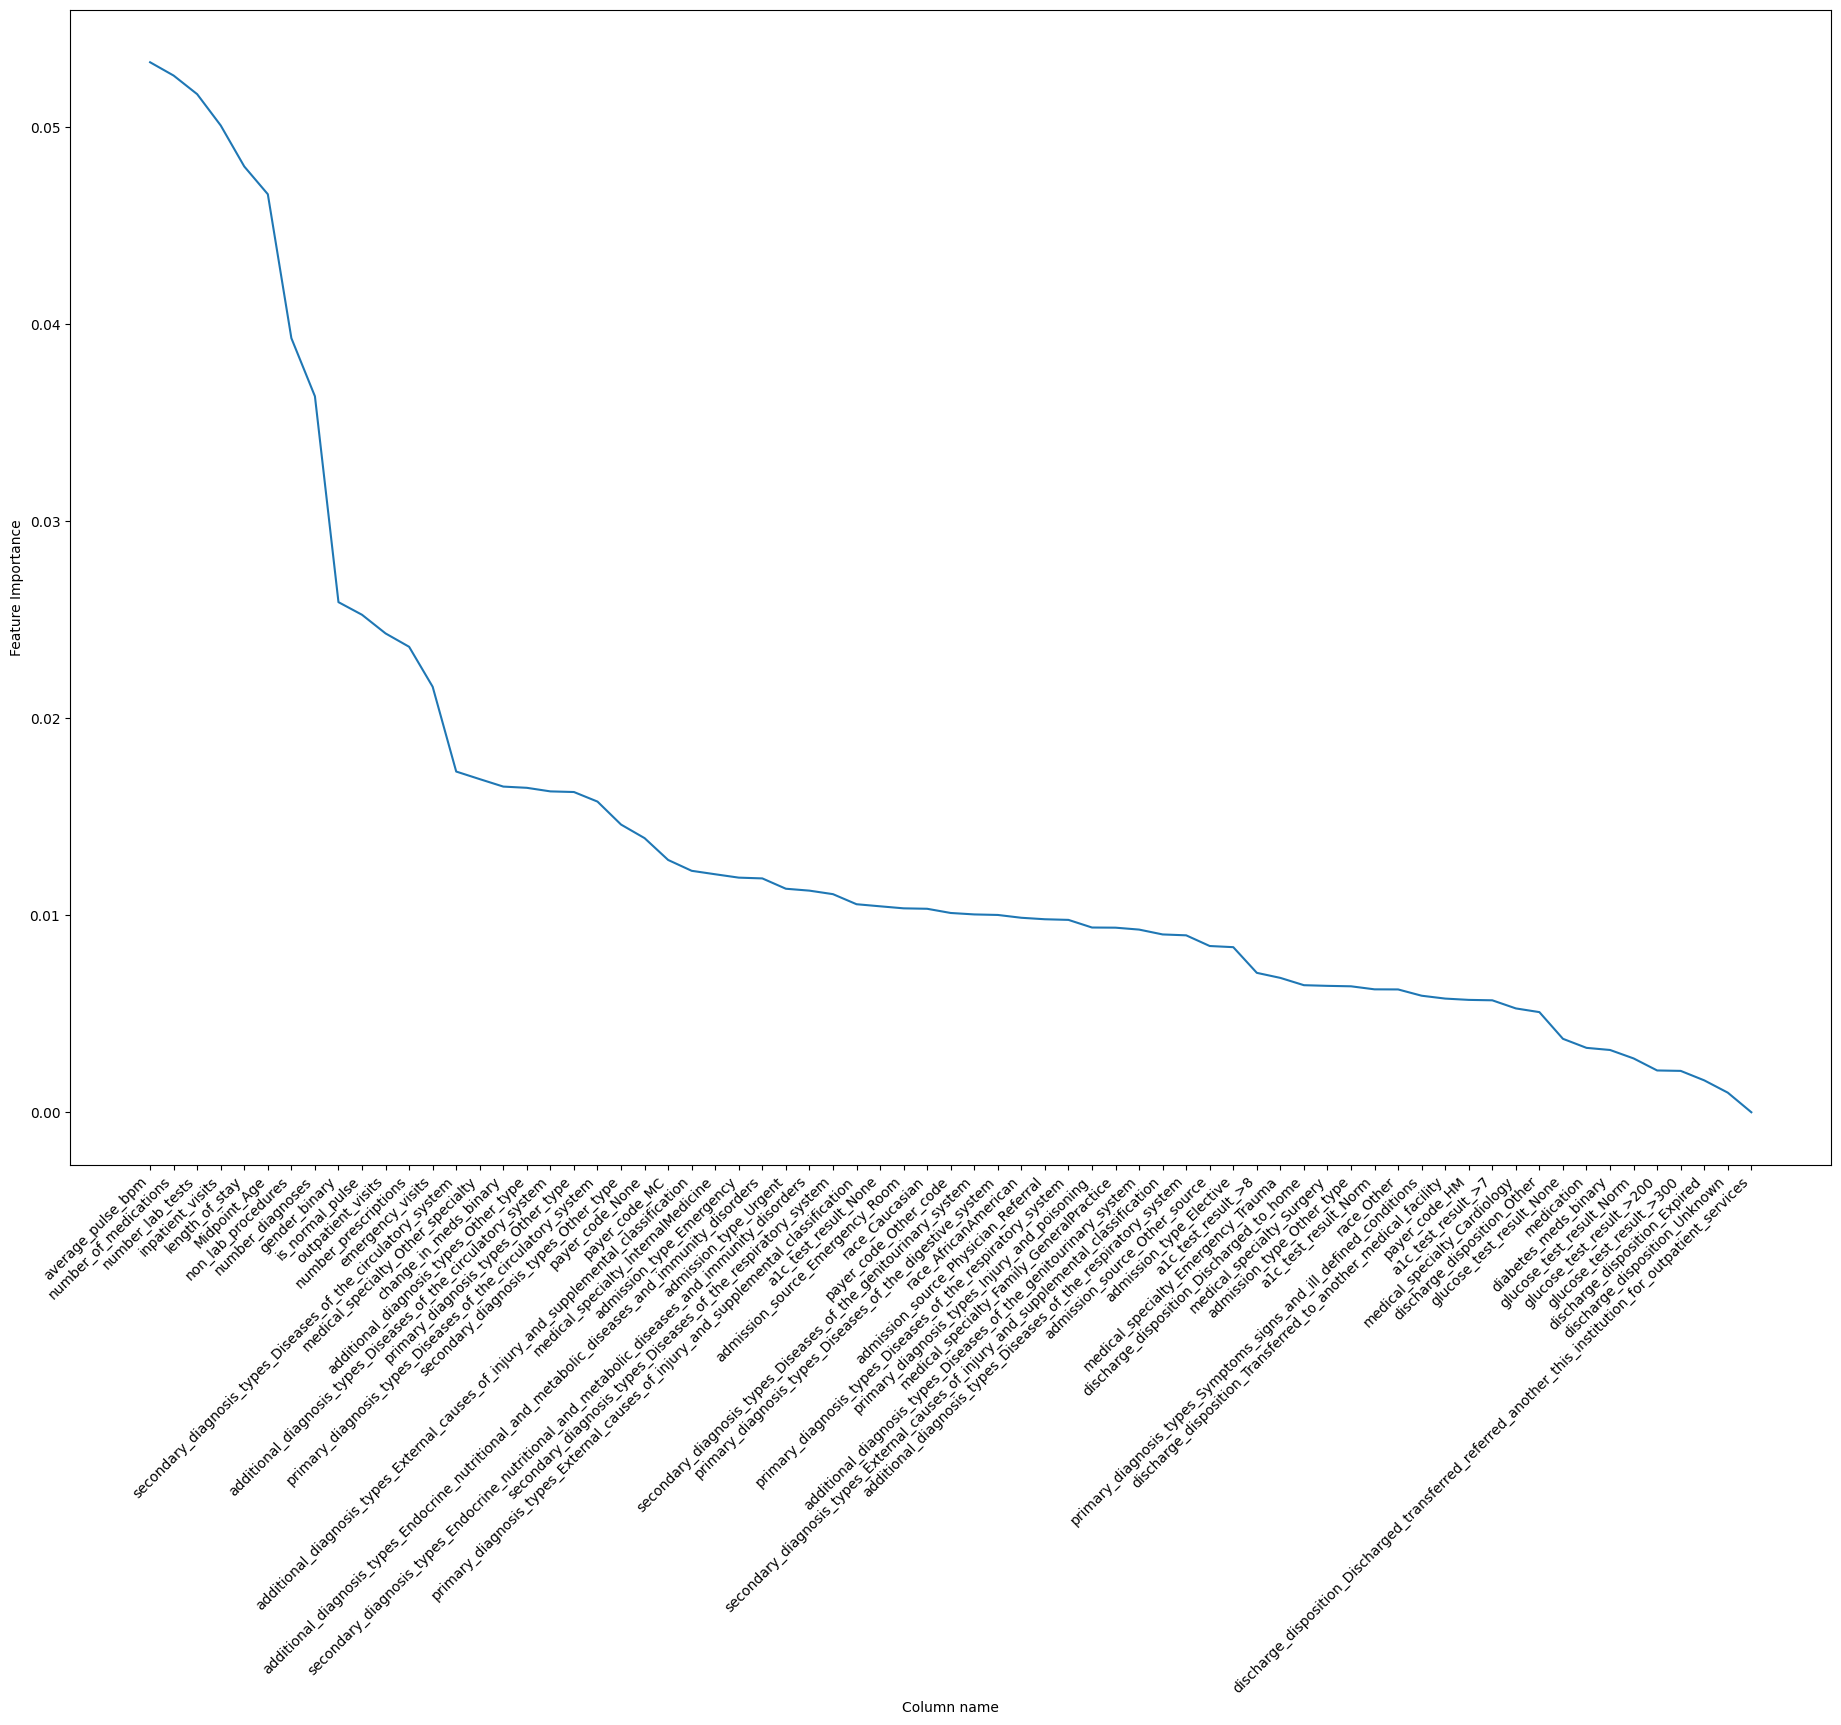

In [35]:
fig = plt.figure(figsize=(50, 15))
plt.subplot(122)
sns.lineplot(feature_importance_df, x='Column name', y="Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.show()

## Final result (Features choosen)

In [15]:
selected_features=['race_Other','Midpoint_Age','discharge_disposition_Expired','discharge_disposition_Other',
                   'discharge_disposition_Transferred_to_another_medical_facility','medical_specialty_Cardiology',
                   'primary_diagnosis_types_External_causes_of_injury_and_supplemental_classification',
                   'primary_diagnosis_types_Injury_and_poisoning','secondary_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders',
                   'secondary_diagnosis_types_External_causes_of_injury_and_supplemental_classification',
                   'additional_diagnosis_types_Endocrine_nutritional_and_metabolic_diseases_and_immunity_disorders',
                   'additional_diagnosis_types_Diseases_of_the_genitourinary_system','glucose_test_result_>300',
                   'a1c_test_result_None','diabetes_meds_binary','change_in_meds_binary','length_of_stay','non_lab_procedures',
                   'number_of_medications','number_diagnoses','emergency_visits','inpatient_visits','discharge_disposition_Discharged_to_home']

In [16]:
len(selected_features)

23

# Normalization Methods

In [17]:
X_train_binary_1 = X_train_binary_1[selected_features]
X_val_binary_1 = X_val_binary_1[selected_features]
test_binary_1 = test_binary_1[selected_features]

In [18]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_binary_1)
X_val_scaled = scaler.transform(X_val_binary_1)

In [19]:
# Min Max Scaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_binary_1)
X_val_minmax = min_max_scaler.transform(X_val_binary_1)

In [20]:
# Min Max Scaler between -1 and 1
min_max_scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
X_train_minmax_neg1_1 = min_max_scaler_neg1_1.fit_transform(X_train_binary_1)
X_val_minmax_neg1_1 = min_max_scaler_neg1_1.transform(X_val_binary_1)

In [21]:
# Robust Scaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train_binary_1)
X_val_robust = robust_scaler.transform(X_val_binary_1)

# Random Undersampling

### GaussianNB

In [25]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [36]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [45]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [54]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [63]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


In [72]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GaussianNB())]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.204


### Logistic Regression

In [26]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.057


In [37]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.104


In [46]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.154


In [55]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.193


In [64]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.229


In [73]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.247


In [113]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', LogisticRegression(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.259


### Decision Tree Classifier

In [28]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.177


In [38]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.188


In [47]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.195


In [56]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.198


In [76]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.205


In [75]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.203


In [111]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', DecisionTreeClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.206


### KNeighbors Classifier

In [29]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.134


In [39]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.179


In [48]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.203


In [57]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.216


In [66]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.222


In [87]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.226


In [110]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', KNeighborsClassifier(n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.227


### MLP Classifier

In [30]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.051


In [40]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.117


In [49]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.183


In [58]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.228


In [67]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.252


In [108]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.265


In [438]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', MLPClassifier(hidden_layer_sizes=(12,), batch_size=64, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.266


### SVC

In [85]:
# model = SVC(random_state=19)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=19)
# scores = cross_val_score(model, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)

### Gradient Boosting Classifer

In [31]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.050


In [41]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.103


In [50]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.168


In [59]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.215


In [68]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.253


In [89]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.266


In [443]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.79, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.271


In [107]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.269


In [440]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.270


In [439]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', GradientBoostingClassifier(subsample=0.5, random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.270


### Random Forest Classifier

In [32]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.074


In [42]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.142


In [51]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.192


In [60]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.217


In [69]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.236


In [91]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.242


In [106]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', RandomForestClassifier(random_state=19))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.245


### ExtraTreesClassifier

In [33]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.101


In [43]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.155


In [52]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.192


In [61]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.211


In [70]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.224


In [92]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.229


In [101]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.233


In [102]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.234


In [103]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', ExtraTreesClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.234


### Bagging Classifier

In [34]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.20, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.120


In [44]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.30, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.165


In [53]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.40, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.185


In [62]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.50, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.201


In [71]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.60, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.210


In [94]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.219


In [95]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.222


In [96]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.90, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.225


In [97]:
steps = [('under', RandomUnderSampler(sampling_strategy=1, random_state=19)), ('model', BaggingClassifier(random_state=19, n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_robust, y_train_binary_1, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.222


# Imbalanced Learning

Cost-sensitive learning: This involves assigning a higher cost to misclassifying minority classes.

In [114]:
y_train_binary_1.value_counts(normalize=True)

readmitted_binary
0    0.88839
1    0.11161
Name: proportion, dtype: float64

In [115]:
y_val_binary_1.value_counts(normalize=True)

readmitted_binary
0    0.888427
1    0.111573
Name: proportion, dtype: float64

### Random Undersampling

Until now the best scores where always with **Robust Scaler** (because of the outliers) so we are going to try all the models with **only Robust Scaler** (for efficiency of time). We can try another option, which would be, handling the outilers (some or all), check the scores with Standard Scaler and/or Min Max Scaler and then compare this scores with the ones we got from Robust Scaler before handling the outliers.

In [551]:
print("Number transactions X_train dataset: ", X_train_binary_1.shape)
print("Number transactions y_train dataset: ", y_train_binary_1.shape)
print("Number transactions X_val dataset: ", X_val_binary_1.shape)
print("Number transactions y_val dataset: ", y_val_binary_1.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_binary_1==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_binary_1==0)))

rus = RandomUnderSampler(sampling_strategy=0.79, random_state=19)
X_train_res, y_train_res = rus.fit_resample(X_train_robust, y_train_binary_1.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (53427, 23)
Number transactions y_train dataset:  (53427,)
Number transactions X_val dataset:  (17809, 23)
Number transactions y_val dataset:  (17809,)
Before OverSampling, counts of label '1': 5963
Before OverSampling, counts of label '0': 47464 

After OverSampling, the shape of train_X: (13511, 23)
After OverSampling, the shape of train_y: (13511,) 

After OverSampling, counts of label '1': 5963
After OverSampling, counts of label '0': 7548


# Algorithms

In [548]:
# Define the models
models = [
    ('dt', DecisionTreeClassifier(random_state=19)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'dt__criterion': ['gini', 'entropy'],
        'dt__splitter': ['best'],
        'dt__max_depth': [5, 10, 15],
        'dt__min_samples_split': [50, 100, 150, 200],
        'dt__min_samples_leaf': [5, 25, 50, 100]
    }, # Decision Tree
    {
        'knn__n_neighbors': [75, 150, 250, 300],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto'],
    }, # K Nearest Neighbors
    {
        'rf__n_estimators': [10, 50, 75, 100],
        'rf__criterion': ['gini', 'entropy'],
        'rf__max_depth': [2, 5, 10],
        'rf__min_samples_split': [2, 10, 50, 100],
        'rf__min_samples_leaf': [1, 5, 10, 15]
    } # Random Forest
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.79, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best
[CV 1/5; 1/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.263 total time=   0.0s
[CV 2/5; 1/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 1/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.253 total time=   0.0s
[CV 3/5; 1/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 1/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.263 total time=   0.0s
[CV 4/5; 1/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min

[CV 1/5; 7/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.265 total time=   0.0s
[CV 2/5; 7/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 7/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.252 total time=   0.0s
[CV 3/5; 7/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 7/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.259 total time=   0.0s
[CV 4/5; 7/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 7/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.257

[CV 4/5; 14/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.249 total time=   0.0s
[CV 5/5; 14/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 14/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.244 total time=   0.0s
[CV 1/5; 15/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 15/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.255 total time=   0.0s
[CV 2/5; 15/96] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 15/96] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best

[CV 5/5; 20/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best;, score=0.242 total time=   0.0s
[CV 1/5; 21/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 1/5; 21/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.246 total time=   0.0s
[CV 2/5; 21/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 21/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.236 total time=   0.0s
[CV 3/5; 21/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 21/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, scor

[CV 5/5; 27/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.239 total time=   0.0s
[CV 1/5; 28/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 1/5; 28/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best;, score=0.257 total time=   0.0s
[CV 2/5; 28/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 2/5; 28/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best;, score=0.240 total time=   0.0s
[CV 3/5; 28/96] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 3/5; 28/96] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best

[CV 5/5; 33/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.238 total time=   0.0s
[CV 1/5; 34/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 34/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.225 total time=   0.0s
[CV 2/5; 34/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 34/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.245 total time=   0.0s
[CV 3/5; 34/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 34/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score

[CV 4/5; 40/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best;, score=0.241 total time=   0.0s
[CV 5/5; 40/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best
[CV 5/5; 40/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best;, score=0.237 total time=   0.0s
[CV 1/5; 41/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 1/5; 41/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.234 total time=   0.0s
[CV 2/5; 41/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 41/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, s

[CV 4/5; 46/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.248 total time=   0.0s
[CV 5/5; 46/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 46/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.241 total time=   0.0s
[CV 1/5; 47/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 47/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.243 total time=   0.0s
[CV 2/5; 47/96] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 47/96] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitt

[CV 2/5; 52/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best;, score=0.253 total time=   0.0s
[CV 3/5; 52/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best
[CV 3/5; 52/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best;, score=0.271 total time=   0.0s
[CV 4/5; 52/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best
[CV 4/5; 52/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best;, score=0.260 total time=   0.0s
[CV 5/5; 52/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitter=best
[CV 5/5; 52/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=200, dt__splitt

[CV 1/5; 58/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.256 total time=   0.0s
[CV 2/5; 58/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 58/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.252 total time=   0.0s
[CV 3/5; 58/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 58/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.257 total time=   0.0s
[CV 4/5; 58/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 58/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=100, dt_

[CV 5/5; 63/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.244 total time=   0.0s
[CV 1/5; 64/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=200, dt__splitter=best
[CV 1/5; 64/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=200, dt__splitter=best;, score=0.255 total time=   0.0s
[CV 2/5; 64/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=200, dt__splitter=best
[CV 2/5; 64/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=200, dt__splitter=best;, score=0.253 total time=   0.0s
[CV 3/5; 64/96] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=200, dt__splitter=best
[CV 3/5; 64/96] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=2

[CV 5/5; 69/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.239 total time=   0.0s
[CV 1/5; 70/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 70/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best;, score=0.251 total time=   0.0s
[CV 2/5; 70/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 70/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best;, score=0.238 total time=   0.0s
[CV 3/5; 70/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 70/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=10

[CV 1/5; 76/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best;, score=0.257 total time=   0.0s
[CV 2/5; 76/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 2/5; 76/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best;, score=0.240 total time=   0.0s
[CV 3/5; 76/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 3/5; 76/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best;, score=0.256 total time=   0.0s
[CV 4/5; 76/96] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=200, dt__splitter=best
[CV 4/5; 76/96] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=2

[CV 1/5; 82/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.219 total time=   0.0s
[CV 2/5; 82/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 82/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.242 total time=   0.0s
[CV 3/5; 82/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 82/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.249 total time=   0.0s
[CV 4/5; 82/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 82/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=100, dt_

[CV 4/5; 87/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.236 total time=   0.0s
[CV 5/5; 87/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 87/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.242 total time=   0.0s
[CV 1/5; 88/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best
[CV 1/5; 88/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best;, score=0.257 total time=   0.0s
[CV 2/5; 88/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=200, dt__splitter=best
[CV 2/5; 88/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=2

[CV 4/5; 93/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.248 total time=   0.0s
[CV 5/5; 93/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 5/5; 93/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.243 total time=   0.0s
[CV 1/5; 94/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 94/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.243 total time=   0.0s
[CV 2/5; 94/96] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 94/96] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_spl

[CV 2/5; 4/8] END knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance;, score=0.255 total time=   0.3s
[CV 3/5; 4/8] START knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance
[CV 3/5; 4/8] END knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance;, score=0.269 total time=   0.4s
[CV 4/5; 4/8] START knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance
[CV 4/5; 4/8] END knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance;, score=0.267 total time=   0.3s
[CV 5/5; 4/8] START knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance
[CV 5/5; 4/8] END knn__algorithm=auto, knn__n_neighbors=150, knn__weights=distance;, score=0.256 total time=   0.3s
[CV 1/5; 5/8] START knn__algorithm=auto, knn__n_neighbors=250, knn__weights=uniform
[CV 1/5; 5/8] END knn__algorithm=auto, knn__n_neighbors=250, knn__weights=uniform;, score=0.255 total time=   0.4s
[CV 2/5; 5/8] START knn__algorithm=auto, knn__n_neighbors=250, knn__weights=unifor

[CV 3/5; 3/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=75;, score=0.180 total time=   0.0s
[CV 4/5; 3/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=75
[CV 4/5; 3/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=75;, score=0.151 total time=   0.1s
[CV 5/5; 3/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=75
[CV 5/5; 3/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=75;, score=0.175 total time=   0.0s
[CV 1/5; 4/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 4/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.1

[CV 1/5; 10/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50;, score=0.177 total time=   0.0s
[CV 2/5; 10/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50
[CV 2/5; 10/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50;, score=0.182 total time=   0.0s
[CV 3/5; 10/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50
[CV 3/5; 10/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50;, score=0.179 total time=   0.0s
[CV 4/5; 10/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50
[CV 4/5; 10/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=50, rf__n_estimators=50

[CV 1/5; 16/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100;, score=0.194 total time=   0.1s
[CV 2/5; 16/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100
[CV 2/5; 16/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100;, score=0.181 total time=   0.1s
[CV 3/5; 16/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100
[CV 3/5; 16/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100;, score=0.186 total time=   0.1s
[CV 4/5; 16/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_estimators=100
[CV 4/5; 16/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=1, rf__min_samples_split=100, rf__n_

[CV 1/5; 22/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.176 total time=   0.0s
[CV 2/5; 22/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 22/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.181 total time=   0.0s
[CV 3/5; 22/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 3/5; 22/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.179 total time=   0.0s
[CV 4/5; 22/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 22/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50

[CV 1/5; 28/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100;, score=0.194 total time=   0.1s
[CV 2/5; 28/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100
[CV 2/5; 28/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100;, score=0.181 total time=   0.1s
[CV 3/5; 28/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100
[CV 3/5; 28/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100;, score=0.186 total time=   0.1s
[CV 4/5; 28/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimators=100
[CV 4/5; 28/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=5, rf__min_samples_split=50, rf__n_estimat

[CV 1/5; 34/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50;, score=0.176 total time=   0.0s
[CV 2/5; 34/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 34/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50;, score=0.182 total time=   0.0s
[CV 3/5; 34/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 34/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50;, score=0.180 total time=   0.0s
[CV 4/5; 34/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 34/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=2, rf__n_estimators=50

[CV 5/5; 39/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=75;, score=0.175 total time=   0.1s
[CV 1/5; 40/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 40/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=100;, score=0.194 total time=   0.1s
[CV 2/5; 40/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 40/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=100;, score=0.181 total time=   0.1s
[CV 3/5; 40/384] START rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 40/384] END rf__criterion=gini, rf__max_depth=2, rf__min_samples_leaf=10, rf__min_samples_split=10, rf__n_e

KeyboardInterrupt: 

In [118]:
test_scores_df

,best_score,best_params
2,0.263642,"{'rf__criterion': 'gini', 'rf__max_depth': 10,..."
0,0.254289,"{'dt__criterion': 'gini', 'dt__max_depth': 10,..."
1,0.249257,"{'knn__algorithm': 'auto', 'knn__n_neighbors':..."


In [ ]:
print(test_scores_df['best_params'][2])
print(test_scores_df['best_params'][0])
print(test_scores_df['best_params'][1])

In [119]:
test_scores_df.to_csv('test_scores_df_unsampling_1.csv', index = False, encoding='utf-8')

In [134]:
# Define the models
models = [
    ('dt', DecisionTreeClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'dt__criterion': ['gini','entropy'],
        'dt__splitter': ['random','best'],
        'dt__max_depth': [5, 10, 15, 20],
        'dt__min_samples_split': [50, 100, 150, 225, 300, 400],
        'dt__min_samples_leaf': [5, 25,50,100]
    } # Decision Tree
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.201 total time=   0.0s
[CV 2/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 2/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 1/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.210 total time=   0.0s
[CV 4/5; 1/384] START dt__criterion=gini, dt__max_depth=5, dt__min_sa

[CV 4/5; 6/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 6/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 6/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 7/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 7/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.201 total time=   0.0s
[CV 2/5; 7/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 7/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, sco

[CV 3/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 12/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 12/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 12/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 13/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 13/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random;, 

[CV 2/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 18/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 18/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best

[CV 1/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 24/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 24/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best

[CV 1/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 30/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 30/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best

[CV 4/5; 35/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.194 total time=   0.0s
[CV 5/5; 35/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 35/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 1/5; 36/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 36/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best;, score=0.245 total time=   0.2s
[CV 2/5; 36/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 36/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitte

[CV 2/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.210 total time=   0.0s
[CV 4/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.196 total time=   0.0s
[CV 5/5; 41/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 41/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150

[CV 5/5; 46/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.196 total time=   0.0s
[CV 2/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.212 total time=   0.0s
[CV 3/5; 47/384] START dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 47/384] END dt__criterion=gini, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=400, 

[CV 3/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 52/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.209 total time=   0.3s
[CV 5/5; 52/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 52/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.220 total time=   0.3s
[CV 1/5; 53/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 53/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=ra

[CV 1/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.240 total time=   0.3s
[CV 2/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.208 total time=   0.3s
[CV 3/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 58/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 58/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best

[CV 4/5; 63/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 5/5; 63/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 63/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.241 total time=   0.0s
[CV 1/5; 64/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 64/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best;, score=0.242 total time=   0.3s
[CV 2/5; 64/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 64/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__

[CV 2/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 3/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 4/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.221 total time=   0.1s
[CV 5/5; 69/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 69/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300

[CV 5/5; 74/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.220 total time=   0.3s
[CV 1/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 2/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 3/5; 75/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 75/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=100, d

[CV 3/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.233 total time=   0.3s
[CV 4/5; 80/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 5/5; 80/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 80/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.218 total time=   0.3s
[CV 1/5; 81/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 81/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__spli

[CV 1/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.238 total time=   0.3s
[CV 2/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 3/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.234 total time=   0.3s
[CV 4/5; 86/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 86/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitt

[CV 4/5; 91/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.218 total time=   0.1s
[CV 5/5; 91/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 91/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.248 total time=   0.0s
[CV 1/5; 92/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 92/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best;, score=0.238 total time=   0.3s
[CV 2/5; 92/384] START dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 92/384] END dt__criterion=gini, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=22

[CV 2/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 3/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 4/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 5/5; 97/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 97/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter

[CV 5/5; 102/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.183 total time=   0.4s
[CV 1/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 2/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.247 total time=   0.1s
[CV 3/5; 103/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 103/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=225, 

[CV 3/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.175 total time=   0.4s
[CV 4/5; 108/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.159 total time=   0.4s
[CV 5/5; 108/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 108/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.181 total time=   0.4s
[CV 1/5; 109/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 109/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__spli

[CV 1/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 2/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.147 total time=   0.4s
[CV 3/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.170 total time=   0.4s
[CV 4/5; 114/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 114/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt_

[CV 5/5; 119/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 1/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.207 total time=   0.4s
[CV 2/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.163 total time=   0.4s
[CV 3/5; 120/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 120/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, d

[CV 4/5; 125/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.251 total time=   0.1s
[CV 5/5; 125/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 125/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.241 total time=   0.1s
[CV 1/5; 126/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 126/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 2/5; 126/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 126/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=15

[CV 2/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 3/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 4/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 4/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.243 total time=   0.1s
[CV 5/5; 131/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 131/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_sp

[CV 5/5; 136/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.172 total time=   0.4s
[CV 1/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.233 total time=   0.1s
[CV 2/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 2/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random;, score=0.254 total time=   0.1s
[CV 3/5; 137/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 137/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_sampl

[CV 3/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.178 total time=   0.4s
[CV 4/5; 142/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.153 total time=   0.4s
[CV 5/5; 142/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 5/5; 142/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.164 total time=   0.4s
[CV 1/5; 143/384] START dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 143/384] END dt__criterion=gini, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split

[CV 1/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.175 total time=   0.4s
[CV 2/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.151 total time=   0.4s
[CV 3/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 3/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.152 total time=   0.4s
[CV 4/5; 148/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 148/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitt

[CV 4/5; 153/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 5/5; 153/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 153/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.214 total time=   0.1s
[CV 1/5; 154/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 1/5; 154/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best;, score=0.168 total time=   0.4s
[CV 2/5; 154/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 154/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__

[CV 3/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 4/5; 159/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 4/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 5/5; 159/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 159/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.220 total time=   0.1s
[CV 1/5; 160/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 160/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_spli

[CV 2/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.227 total time=   0.1s
[CV 3/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.244 total time=   0.1s
[CV 4/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random;, score=0.229 total time=   0.1s
[CV 5/5; 165/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 165/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_sp

[CV 5/5; 170/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.177 total time=   0.5s
[CV 1/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.231 total time=   0.1s
[CV 2/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 3/5; 171/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 171/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split

[CV 3/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.162 total time=   0.4s
[CV 4/5; 176/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.136 total time=   0.4s
[CV 5/5; 176/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 176/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.166 total time=   0.4s
[CV 1/5; 177/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 177/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=300, d

[CV 1/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 2/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.172 total time=   0.4s
[CV 3/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best;, score=0.176 total time=   0.4s
[CV 4/5; 182/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 182/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt_

[CV 4/5; 187/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 5/5; 187/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 187/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.231 total time=   0.1s
[CV 1/5; 188/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 188/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 2/5; 188/384] START dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 188/384] END dt__criterion=gini, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_s

[CV 2/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.259 total time=   0.0s
[CV 4/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 193/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 193/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_s

[CV 5/5; 198/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.220 total time=   0.0s
[CV 2/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 199/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 199/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_sampl

[CV 3/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 204/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.234 total time=   0.2s
[CV 5/5; 204/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 5/5; 204/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 205/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 205/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_spli

[CV 1/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.223 total time=   0.3s
[CV 3/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 210/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 210/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_

[CV 4/5; 215/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 215/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 215/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 1/5; 216/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 216/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 216/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 216/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=25, dt__min_sa

[CV 2/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 3/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.259 total time=   0.0s
[CV 4/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random;, score=0.253 total time=   0.0s
[CV 5/5; 221/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 221/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__

[CV 5/5; 226/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.220 total time=   0.0s
[CV 2/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random;, score=0.252 total time=   0.0s
[CV 3/5; 227/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 227/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=50, dt__mi

[CV 3/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 232/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 5/5; 232/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 232/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.253 total time=   0.2s
[CV 1/5; 233/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 233/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min

[CV 1/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 2/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.222 total time=   0.2s
[CV 3/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best;, score=0.247 total time=   0.2s
[CV 4/5; 238/384] START dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 238/384] END dt__criterion=entropy, dt__max_depth=5, dt__min_samples_leaf=100, dt__min_s

[CV 4/5; 243/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.256 total time=   0.1s
[CV 5/5; 243/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 243/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 1/5; 244/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 244/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best;, score=0.247 total time=   0.3s
[CV 2/5; 244/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 244/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_sa

[CV 2/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.258 total time=   0.0s
[CV 3/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.259 total time=   0.1s
[CV 4/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random;, score=0.243 total time=   0.1s
[CV 5/5; 249/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 249/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=5, dt__

[CV 5/5; 254/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.228 total time=   0.4s
[CV 1/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.247 total time=   0.0s
[CV 2/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 3/5; 255/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 255/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, 

[CV 3/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.230 total time=   0.3s
[CV 4/5; 260/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.214 total time=   0.3s
[CV 5/5; 260/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 260/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.229 total time=   0.4s
[CV 1/5; 261/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 261/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=25, dt__min

[CV 1/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.245 total time=   0.3s
[CV 2/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.205 total time=   0.3s
[CV 3/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best;, score=0.230 total time=   0.4s
[CV 4/5; 266/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 266/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples

[CV 4/5; 271/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.238 total time=   0.1s
[CV 5/5; 271/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 271/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 1/5; 272/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 272/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best;, score=0.245 total time=   0.3s
[CV 2/5; 272/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 272/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=50, dt_

[CV 2/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.248 total time=   0.0s
[CV 3/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 4/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.260 total time=   0.1s
[CV 5/5; 277/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 277/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=1

[CV 4/5; 282/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.203 total time=   0.3s
[CV 5/5; 282/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 282/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.216 total time=   0.3s
[CV 1/5; 283/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 1/5; 283/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 2/5; 283/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=225, dt__splitter=random
[CV 2/5; 283/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=1

[CV 1/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.244 total time=   0.3s
[CV 2/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.201 total time=   0.4s
[CV 3/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 3/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.235 total time=   0.3s
[CV 4/5; 288/384] START dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 4/5; 288/384] END dt__criterion=entropy, dt__max_depth=10, dt__min_samples_leaf=100, dt

[CV 4/5; 293/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 5/5; 293/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 293/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=random;, score=0.244 total time=   0.1s
[CV 1/5; 294/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 1/5; 294/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best;, score=0.198 total time=   0.4s
[CV 2/5; 294/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=150, dt__splitter=best
[CV 2/5; 294/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_sa

[CV 3/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.246 total time=   0.1s
[CV 4/5; 299/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random
[CV 4/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.223 total time=   0.1s
[CV 5/5; 299/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 299/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=random;, score=0.241 total time=   0.1s
[CV 1/5; 300/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 300/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=5, dt__mi

[CV 2/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 3/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 3/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.232 total time=   0.1s
[CV 4/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 4/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random;, score=0.254 total time=   0.1s
[CV 5/5; 305/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=150, dt__splitter=random
[CV 5/5; 305/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=2

[CV 5/5; 310/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=300, dt__splitter=best;, score=0.165 total time=   0.4s
[CV 1/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 1/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.225 total time=   0.1s
[CV 2/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 2/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random;, score=0.250 total time=   0.1s
[CV 3/5; 311/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25, dt__min_samples_split=400, dt__splitter=random
[CV 3/5; 311/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=25,

[CV 3/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.184 total time=   0.4s
[CV 4/5; 316/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 4/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.149 total time=   0.4s
[CV 5/5; 316/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best
[CV 5/5; 316/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=100, dt__splitter=best;, score=0.182 total time=   0.4s
[CV 1/5; 317/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=150, dt__splitter=random
[CV 1/5; 317/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min

[CV 1/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.196 total time=   0.4s
[CV 2/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 2/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.183 total time=   0.4s
[CV 3/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 3/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best;, score=0.181 total time=   0.4s
[CV 4/5; 322/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_samples_split=300, dt__splitter=best
[CV 4/5; 322/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=50, dt__min_s

[CV 4/5; 327/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random;, score=0.245 total time=   0.1s
[CV 5/5; 327/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random
[CV 5/5; 327/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=random;, score=0.258 total time=   0.1s
[CV 1/5; 328/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 1/5; 328/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best;, score=0.194 total time=   0.4s
[CV 2/5; 328/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=100, dt__splitter=best
[CV 2/5; 328/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=1

[CV 2/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 3/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 3/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.252 total time=   0.1s
[CV 4/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 4/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random;, score=0.227 total time=   0.1s
[CV 5/5; 333/384] START dt__criterion=entropy, dt__max_depth=15, dt__min_samples_leaf=100, dt__min_samples_split=300, dt__splitter=random
[CV 5/5; 333/384] END dt__criterion=entropy, dt__max_depth=15, dt__min_samples_

[CV 5/5; 338/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=50, dt__splitter=best;, score=0.179 total time=   0.5s
[CV 1/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 1/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.222 total time=   0.1s
[CV 2/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 2/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random;, score=0.228 total time=   0.1s
[CV 3/5; 339/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=100, dt__splitter=random
[CV 3/5; 339/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min

[CV 3/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.167 total time=   0.5s
[CV 4/5; 344/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best
[CV 4/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.144 total time=   0.5s
[CV 5/5; 344/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best
[CV 5/5; 344/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=225, dt__splitter=best;, score=0.166 total time=   0.5s
[CV 1/5; 345/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_samples_split=300, dt__splitter=random
[CV 1/5; 345/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5, dt__min_sample

[CV 1/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.154 total time=   0.5s
[CV 2/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 2/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.145 total time=   0.5s
[CV 3/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 3/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best;, score=0.161 total time=   0.5s
[CV 4/5; 350/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=50, dt__splitter=best
[CV 4/5; 350/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples

[CV 4/5; 355/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random;, score=0.242 total time=   0.1s
[CV 5/5; 355/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 355/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=random;, score=0.236 total time=   0.1s
[CV 1/5; 356/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 1/5; 356/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best;, score=0.160 total time=   0.5s
[CV 2/5; 356/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt__min_samples_split=225, dt__splitter=best
[CV 2/5; 356/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=25, dt_

[CV 3/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.234 total time=   0.1s
[CV 4/5; 361/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random
[CV 4/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 5/5; 361/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random
[CV 5/5; 361/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 1/5; 362/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=50, dt__splitter=best
[CV 1/5; 362/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__m

[CV 2/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 3/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 3/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.249 total time=   0.1s
[CV 4/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 4/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random;, score=0.240 total time=   0.1s
[CV 5/5; 367/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=225, dt__splitter=random
[CV 5/5; 367/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=5

[CV 5/5; 372/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=50, dt__min_samples_split=400, dt__splitter=best;, score=0.169 total time=   0.4s
[CV 1/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 1/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.215 total time=   0.1s
[CV 2/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 2/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random;, score=0.237 total time=   0.1s
[CV 3/5; 373/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=50, dt__splitter=random
[CV 3/5; 373/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100

[CV 2/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.171 total time=   0.5s
[CV 3/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 3/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.171 total time=   0.4s
[CV 4/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 4/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best;, score=0.151 total time=   0.5s
[CV 5/5; 378/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=150, dt__splitter=best
[CV 5/5; 378/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt

[CV 4/5; 383/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.248 total time=   0.1s
[CV 5/5; 383/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random
[CV 5/5; 383/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=random;, score=0.239 total time=   0.1s
[CV 1/5; 384/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 1/5; 384/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best;, score=0.177 total time=   0.5s
[CV 2/5; 384/384] START dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=100, dt__min_samples_split=400, dt__splitter=best
[CV 2/5; 384/384] END dt__criterion=entropy, dt__max_depth=20, dt__min_samples_leaf=1

In [135]:
test_scores_df

,best_score,best_params
0,0.252422,"{'dt__criterion': 'entropy', 'dt__max_depth': ..."


In [136]:
test_scores_df.to_csv('test_scores_df_unsampling_dt_3.csv', index = False, encoding='utf-8')

In [ ]:
# Define the models
models = [
    ('knn', KNeighborsClassifier())
]

# Define the hyperparameters  
hyperparameters = [
    {
        'knn__n_neighbors': [290,300,310],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['ball_tree'],
    } # K Nearest Neighbors
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_knn_3.csv', index = False, encoding='utf-8')

### Random Forest

In [ ]:
# Define the models
models = [
    ('rf', RandomForestClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'rf__n_estimators': [10, 50, 75, 100],
        'rf__criterion': ['gini', 'entropy'],
        'rf__max_depth': [2, 5, 10],
        'rf__min_samples_split': [2, 10, 50, 100],
        'rf__min_samples_leaf': [1, 5, 10, 15]
    } # Random Forest
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_rf_1.csv', index = False, encoding='utf-8')

In [434]:
rf_model_1 = RandomForestClassifier(random_state=19,criterion='gini',max_depth=7,min_samples_leaf=9,min_samples_split=28,n_estimators=29)
rf_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = rf_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = rf_model_1.predict(X_val_binary_1)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_1, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5386403253922138
F1 Score for Validation Data: 0.2670724747955107


### Gradient Boosting Classifier

In [467]:
# Define the models
models = [
    ('gbc', GradientBoostingClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'gbc__n_estimators': [180],'gbc__max_depth': [4,5,6],'gbc__min_samples_split': [10],
        'gbc__min_samples_leaf': [10,15],'gbc__learning_rate': [0.01],
        'gbc__subsample':[0.9]
    }
                  ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.79, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9
[CV 1/5; 1/6] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9;, score=0.270 total time=   1.4s
[CV 2/5; 1/6] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9
[CV 2/5; 1/6] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9;, score=0.241 total time=   1.4s
[CV 3/5; 1/6] START gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9
[CV 3/5; 1/6] END gbc__learning_rate=0.01, gbc__max_depth=4, gbc__min_samples_leaf=10, g

[CV 4/5; 5/6] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9;, score=0.269 total time=   2.1s
[CV 5/5; 5/6] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9
[CV 5/5; 5/6] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9;, score=0.270 total time=   2.2s
[CV 1/5; 6/6] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9
[CV 1/5; 6/6] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_split=10, gbc__n_estimators=180, gbc__subsample=0.9;, score=0.265 total time=   2.1s
[CV 2/5; 6/6] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_split=10, g

In [468]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [469]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__learning_rate,param_gbc__max_depth,param_gbc__min_samples_leaf,param_gbc__min_samples_split,param_gbc__n_estimators,param_gbc__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,2.191416,0.005372,0.050014,0.006237,0.01,6,10,10,180,0.9,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':...",0.267872,0.252349,0.276204,0.269105,0.269651,0.267036,0.007894,1
5,2.175301,0.015956,0.045817,0.001828,0.01,6,15,10,180,0.9,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':...",0.265379,0.253755,0.275900,0.269577,0.267833,0.266489,0.007256,2
2,1.830372,0.014669,0.040012,0.006063,0.01,5,10,10,180,0.9,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':...",0.270875,0.249036,0.275802,0.267152,0.268472,0.266267,0.009107,3
3,1.844051,0.011419,0.041799,0.009256,0.01,5,15,10,180,0.9,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':...",0.269960,0.248352,0.275721,0.266927,0.269459,0.266084,0.009321,4
1,1.505550,0.020999,0.033377,0.004166,0.01,4,15,10,180,0.9,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':...",0.272020,0.241538,0.277933,0.270523,0.267327,0.265868,0.012643,5


In [470]:
test_scores_df

,best_score,best_params
0,0.267036,"{'gbc__learning_rate': 0.01, 'gbc__max_depth':..."


In [471]:
cv_results_dfs[0].to_csv('test_scores_df_unsampling_gb_5.csv', index = False, encoding='utf-8')

In [552]:
gb_model_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=5,min_samples_leaf=7,min_samples_split=15,n_estimators=153,subsample=0.90)
gb_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = gb_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = gb_model_1.predict(X_val_binary_1)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_1, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5024164524421595
F1 Score for Validation Data: 0.2499463173716985


### Support Vector Classification

In [ ]:
# Define the models
models = [
    ('svc', SVC(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'svc__C': [0.05,0.1,0.2],'svc__kernel': ['rbf'],'svc__gamma': ['scale']
    }
                  ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_svc_3.csv', index = False, encoding='utf-8')

### Logistic Regression

In [ ]:
# Define the models
models = [
    ('lr1', LogisticRegression(random_state=19)),
    ('lr2', LogisticRegression(random_state=19)),
    ('lr3', LogisticRegression(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'lr1__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
        'lr1__penalty': ['l2', None],
        'lr1__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'lr2__solver': ['liblinear'], 
        'lr2__penalty': ['l1', 'l2'],
        'lr2__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    {
        'lr3__solver': ['saga'], 
        'lr3__penalty': ['l1','elasticnet'],
        'lr3__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'lr3__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
                   ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_lr_1.csv', index = False, encoding='utf-8')

In [ ]:
# Define the models
models = [
    ('lr1', LogisticRegression(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'lr1__solver': ['newton-cholesky'], 
        'lr1__penalty': ['l2', None],
        'lr1__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
                   ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_lr_newton_cholesky_1.csv', index = False, encoding='utf-8')

### Gaussian Naive Bayes

In [ ]:
### Define the models
models = [
    ('GaussianNB', GaussianNB())
]

hyperparameters = [{}]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_gauss_1.csv', index = False, encoding='utf-8')

### MLP Classifier

In [ ]:
### Define the models
models = [
    ('mlp', MLPClassifier(random_state=19))
]

hyperparameters = [
    {
        'mlp__hidden_layer_sizes': [(14,14)],
        'mlp__activation': ['tanh', 'relu'],
        'mlp__solver': ['sgd', 'adam'],
        'mlp__learning_rate': ['invscaling','adaptive'],  # Learning rate schedule for weight updates.
        'mlp__alpha': [0.01,0.001],  # L2 penalty (regularization term) parameter.
        'mlp__learning_rate_init': [0.01,0.001],  # The initial learning rate used. It controls the step-size in updating the weights.
        'mlp__max_iter': [200],  # Maximum number of iterations for the solver to converge. 
        'mlp__batch_size': [64]
    }
                  ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_robust, y_train_binary_1)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_restart_mlp_4.csv', index = False, encoding='utf-8')

# Kaggle Submissions

In [131]:
enc_merge = pd.DataFrame(test_binary_1_copy['encounter_id'])

In [ ]:
gaussian_1 = GaussianNB()
gaussian_1.fit(X_train_res, y_train_res)
gauss_guess_1 = gaussian_1.predict(test_binary_1)
gauss_df_1 = pd.DataFrame(gauss_guess_1)
print(gauss_df_1.value_counts())
gauss_df_1 = pd.concat([enc_merge, gauss_df_1], axis=1)
gauss_df_1.columns = ['encounter_id', 'readmitted_binary']
gauss_series_1 = gauss_df_1.set_index('encounter_id')['readmitted_binary']
gauss_series_1

In [ ]:
gauss_series_1.to_csv('Group18_Version01.csv')

In [ ]:
y_train_res = np.where(y_train_res==1, 'Yes', 'No')
y_train_res

In [ ]:
dt_1 = DecisionTreeClassifier(random_state=19, criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=20, splitter='best')
dt_1.fit(X_train_res, y_train_res)
dt_guess_1 = dt_1.predict(test_binary_1)
dt_df_1 = pd.DataFrame(dt_guess_1)
print(dt_df_1.value_counts())
dt_df_1 = pd.concat([enc_merge, dt_df_1], axis=1)
dt_df_1.columns = ['encounter_id', 'readmitted_binary']
dt_series_1 = dt_df_1.set_index('encounter_id')['readmitted_binary']
dt_series_1

In [ ]:
# y_pred_val = dt_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
dt_series_1.to_csv('Group18_Version03.csv')

In [ ]:
knn_1 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=310, weights='distance')
knn_1.fit(X_train_res, y_train_res)
knn_guess_1 = knn_1.predict(test_binary_1)
knn_df_1 = pd.DataFrame(knn_guess_1)
print(knn_df_1.value_counts())
knn_df_1 = pd.concat([enc_merge, knn_df_1], axis=1)
knn_df_1.columns = ['encounter_id', 'readmitted_binary']
knn_series_1 = knn_df_1.set_index('encounter_id')['readmitted_binary']
knn_series_1

In [ ]:
y_pred_val = knn_1.predict(X_val_binary_1)
# f1_val = f1_score(y_val_binary_1, y_pred_val)
# print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# y_val_binary_1 = np.where(y_val_binary_1=='Yes', 1, 0)
# y_val_binary_1

In [ ]:
# np.unique(y_val_binary_1,return_counts=True)

In [435]:
rf_1 = RandomForestClassifier(random_state=19,criterion='gini',max_depth=7,min_samples_leaf=9,min_samples_split=28,n_estimators=29)
rf_1.fit(X_train_res, y_train_res)
rf_guess_1 = rf_1.predict(test_binary_1)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    25037
1     5493
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [436]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [437]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version12.csv')

In [556]:
gb_1 = GradientBoostingClassifier(random_state=19,learning_rate=0.01,max_depth=5,min_samples_leaf=7,min_samples_split=15,n_estimators=153,subsample=0.90)
gb_1.fit(X_train_res, y_train_res)
gb_guess_1 = gb_1.predict(test_binary_1)
gb_df_1 = pd.DataFrame(gb_guess_1)
print(gb_df_1.value_counts())
gb_df_1 = pd.concat([enc_merge, gb_df_1], axis=1)
gb_df_1.columns = ['encounter_id', 'readmitted_binary']
gb_series_1 = gb_df_1.set_index('encounter_id')['readmitted_binary']
gb_series_1

0    26063
1     4467
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    0
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [557]:
gb_series_1 = gb_series_1.map({0: 'No', 1: 'Yes'})
gb_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [558]:
gb_series_1.to_csv('Kaggle_Submissions/Group18_Version13.csv')

### Logistic Regression

In [ ]:
lr_1 = LogisticRegression(C=0.001,l1_ratio=0.1,penalty='elasticnet',solver='saga')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

In [ ]:
lr_1 = LogisticRegression(C=0.001,penalty='l2',solver='newton-cg')
lr_1.fit(X_train_res, y_train_res)
lr_guess_1 = lr_1.predict(test_binary_1)
lr_df_1 = pd.DataFrame(lr_guess_1)
print(lr_df_1.value_counts())
lr_df_1 = pd.concat([enc_merge, lr_df_1], axis=1)
lr_df_1.columns = ['encounter_id', 'readmitted_binary']
lr_series_1 = lr_df_1.set_index('encounter_id')['readmitted_binary']
lr_series_1

### MLP Classifier

In [ ]:
mlp_1 = MLPClassifier(activation='tanh',alpha=0.001,batch_size=64,hidden_layer_sizes=(12, 12),learning_rate='invscaling',learning_rate_init=0.01,max_iter=200,solver='sgd')
mlp_1.fit(X_train_res, y_train_res)
mlp_guess_1 = mlp_1.predict(test_binary_1)
mlp_df_1 = pd.DataFrame(mlp_guess_1)
print(mlp_df_1.value_counts())
mlp_df_1 = pd.concat([enc_merge, mlp_df_1], axis=1)
mlp_df_1.columns = ['encounter_id', 'readmitted_binary']
mlp_series_1 = mlp_df_1.set_index('encounter_id')['readmitted_binary']
mlp_series_1

In [ ]:
mlp_series_1.to_csv('Kaggle_Submissions/Group18_Version06.csv')

### Support Vector Machines

In [ ]:
svc_1 = SVC(C=0.05,gamma='scale',kernel='rbf')
svc_1.fit(X_train_res, y_train_res)
svc_guess_1 = svc_1.predict(test_binary_1)
svc_df_1 = pd.DataFrame(svc_guess_1)
print(svc_df_1.value_counts())
svc_df_1 = pd.concat([enc_merge, svc_df_1], axis=1)
svc_df_1.columns = ['encounter_id', 'readmitted_binary']
svc_series_1 = svc_df_1.set_index('encounter_id')['readmitted_binary']
svc_series_1

In [ ]:
svc_series_1.to_csv('Kaggle_Submissions/Group18_Version07.csv')